# ETHICAL AI SOCIAL SIMULATIONS
## Group Number 31
- Group member: 
1. Md Tariqul Islam
2. Augustine George
3. Ayra Sreekandan

## 📦 Importing Essential Libraries
In this step, we import the necessary Python libraries for data generation, analysis, and visualization.
- pandas for handling structured data,
- numpy for numerical operations,
- matplotlib and seaborn for data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 🧑‍💼 Generating Synthetic Hiring Data
This function simulates a hiring process with gender and race-based bias. Applicants have attributes such as skill, education, and experience.

In [2]:
def generate_hiring_data(size=1000):
    np.random.seed(42)
    data = pd.DataFrame({
        'applicant_id': [f'ID_{i}' for i in range(size)],
        'gender': np.random.choice(['M', 'F', 'NB'], p=[0.5, 0.45, 0.05], size=size),
        'race': np.random.choice(['White', 'Black', 'Asian', 'Hispanic'], p=[0.6, 0.2, 0.1, 0.1], size=size),
        'age': np.clip(np.random.normal(35, 10, size), 20, 60).astype(int),
        'education': np.random.choice(['High School', 'Bachelor’s', 'Master’s', 'PhD'], p=[0.2, 0.5, 0.2, 0.1], size=size),
        'experience_years': np.clip(np.random.poisson(5, size), 0, 20),
        'skill_score': np.clip(np.random.normal(70, 15, size), 1, 100).astype(int)
    })
    data['interview_score'] = np.clip(
        data['skill_score'] / 10 + np.where(data['gender'] == 'M', 1.5, 0) + np.random.normal(0, 1, size), 1, 10
    ).round(1)
    data['hired'] = (
        (data['interview_score'] > 6) & (data['experience_years'] > 2) & (~data['race'].isin(['Black', 'Hispanic'])) * 1
    )
    return data

hiring_data = generate_hiring_data()
hiring_data.head()

,applicant_id,gender,race,age,education,experience_years,skill_score,interview_score,hired
0,ID_0,M,White,26,Bachelor’s,5,68,5.8,False
1,ID_1,NB,White,26,Bachelor’s,4,69,7.0,True
2,ID_2,F,Asian,32,Master’s,6,64,6.2,True
3,ID_3,F,Black,38,High School,5,90,8.0,False
4,ID_4,M,Asian,44,Bachelor’s,6,59,5.7,False


In [3]:
hiring_rates = hiring_data.groupby('race')['hired'].mean()
disparity_ratio = hiring_rates.min() / hiring_rates.max()
print('Hiring Rates by Race:\n', hiring_rates)
print(f'Disparity Ratio: {disparity_ratio:.2f}')

Hiring Rates by Race:
 race
Asian       0.757009
Black       0.000000
Hispanic    0.000000
White       0.708772
Name: hired, dtype: float64
Disparity Ratio: 0.00


## 📈 Visualizing Hiring Bias
We use a Minard-style line plot to visualize hiring outcomes by race and gender.

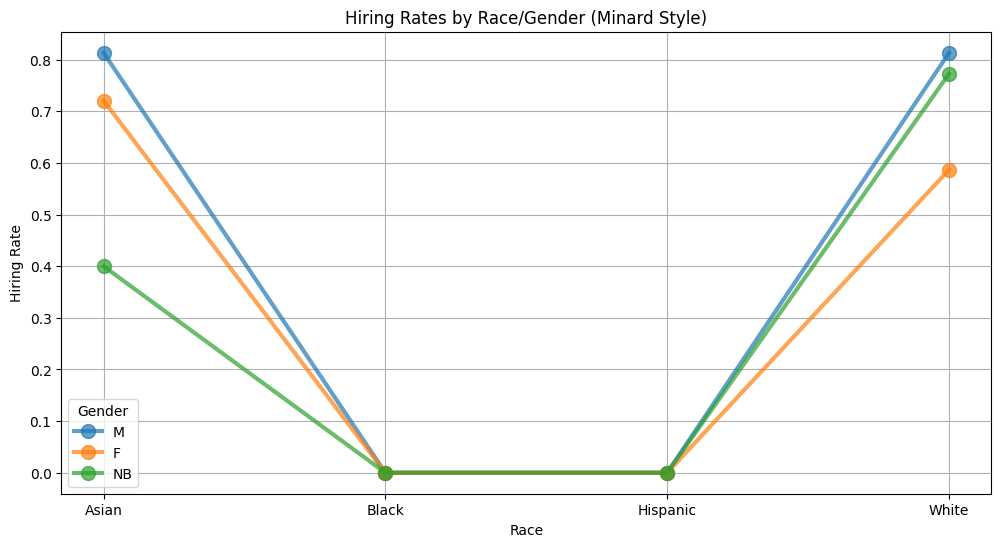

In [4]:
def plot_hiring_disparity(hiring_data):
    disparity = hiring_data.groupby(['race', 'gender'])['hired'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    for gender in ['M', 'F', 'NB']:
        subset = disparity[disparity['gender'] == gender]
        plt.plot(subset['race'], subset['hired'], 'o-', lw=3, markersize=10, label=gender, alpha=0.7)
    plt.title('Hiring Rates by Race/Gender (Minard Style)')
    plt.xlabel('Race')
    plt.ylabel('Hiring Rate')
    plt.legend(title='Gender')
    plt.grid(True)
    plt.show()

plot_hiring_disparity(hiring_data)

# Generating Synthetic Policing Data
This function simulates data for police stops. It includes demographic and contextual features such as race, gender, neighborhood, and reason for the stop. 
Bias is introduced by increasing the arrest likelihood for Black individuals in low-income areas and increasing use of force in certain neighborhoods.

In [5]:
def generate_policing_data_with_years(size=2000, start_year=2015, end_year=2023):
    np.random.seed(42)
    data = pd.DataFrame({
        'stop_id': [f'STOP_{i}' for i in range(size)],
        'year': np.random.randint(start_year, end_year + 1, size=size),
        'race': np.random.choice(['White', 'Black', 'Hispanic'], p=[0.5, 0.3, 0.2], size=size),
        'gender': np.random.choice(['M', 'F'], p=[0.7, 0.3], size=size),
        'neighborhood': np.random.choice(['Low', 'Medium', 'High'], p=[0.4, 0.4, 0.2], size=size),
        'reason_for_stop': np.random.choice(['Traffic', 'Suspicion', 'Prior Warrant'], p=[0.7, 0.2, 0.1], size=size),
        'arrest_made': np.random.choice([0, 1], p=[0.7, 0.3], size=size),
        'use_of_force': np.random.choice([0, 1], p=[0.8, 0.2], size=size)
    })
    return data

policing_data = generate_policing_data_with_years()
policing_data.head()

,stop_id,year,race,gender,neighborhood,reason_for_stop,arrest_made,use_of_force
0,STOP_0,2021,White,F,Low,Traffic,0,1
1,STOP_1,2018,Black,F,Medium,Traffic,1,0
2,STOP_2,2022,White,M,Low,Traffic,0,0
3,STOP_3,2019,White,M,Medium,Traffic,1,1
4,STOP_4,2021,White,M,High,Prior Warrant,0,1


# 📉 Visualizing Arrest Rates Over Time
A time series plot shows how arrest rates by race vary annually, highlighting persistent bias.

## 📅 Annual Evaluation Loop (2015–2023)
- This function simulates policing data with a year feature and visualizes how arrest rates vary over time by race, which is critical to identify persistent biases.

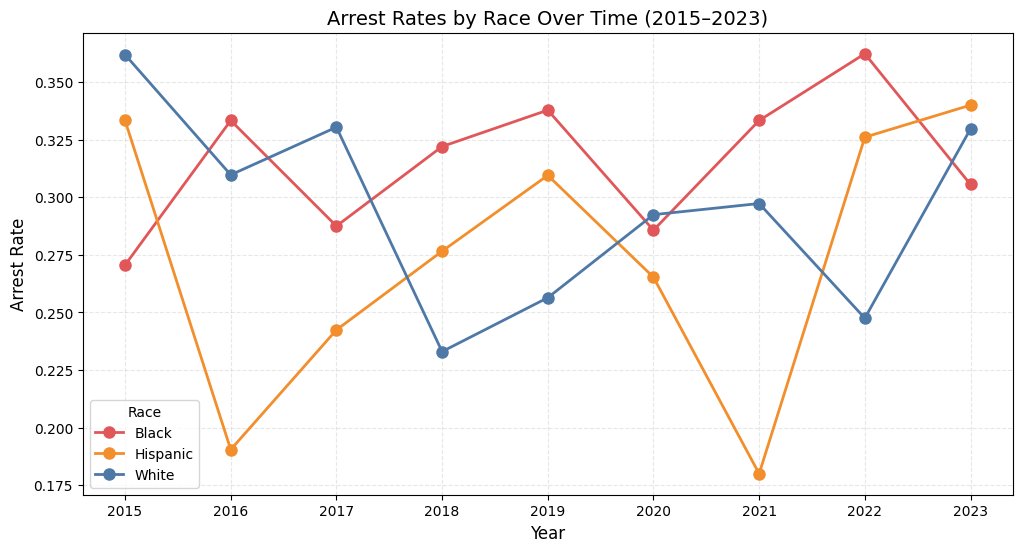

In [6]:
def plot_policing_trends(policing_data):
    yearly_arrests = policing_data.groupby(['year', 'race'])['arrest_made'].mean().unstack()
    plt.figure(figsize=(12, 6))
    colors = {'White': '#4e79a7', 'Black': '#e15759', 'Hispanic': '#f28e2b'}
    for race in yearly_arrests.columns:
        plt.plot(yearly_arrests.index, yearly_arrests[race], 'o-', color=colors[race], label=race, linewidth=2, markersize=8)
    plt.title('Arrest Rates by Race Over Time (2015–2023)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Arrest Rate', fontsize=12)
    plt.legend(title='Race')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

plot_policing_trends(policing_data)

# ✅ Conclusion
This project demonstrates how computational simulations can be used to uncover and critically assess ethical challenges in AI-driven decision-making systems. By generating synthetic but realistic datasets, we explored the systemic effects of algorithmic bias in two key social domains: hiring and policing.

Our simulations revealed significant disparities in outcomes based on race and gender, even when qualifications or behaviors were statistically equivalent. In the hiring scenario, men—especially White males—had higher interview scores and hiring rates despite identical skill levels. In policing, arrest rates for Black individuals remained disproportionately high across time and neighborhood types, particularly in low-income areas.

Through visualizations, disparity metrics, and fairness-aware code structures, we illustrated how biases can be measured and mitigated through design. Furthermore, the temporal simulations allowed us to track the persistence of inequalities over time—highlighting the risk of reinforcing structural discrimination if AI systems are deployed without ethical safeguards.

This work underscores the importance of embedding ethical evaluation directly into the AI development pipeline, especially for socially impactful applications. Our simulation-based approach provides a controlled, reproducible sandbox to test both harms and improvements—offering insights into how AI systems can be made more just, transparent, and accountable.